In [1]:
from ultralytics import YOLO
import os
from hierarchical_yolo.mscoco_hierarchical_model import MSCOCOHierarchicalDetectionTrainer
import hierarchical_yolo.mscoco_hierarchical_model
import hierarchical_yolo.yolo_utils
import ultralytics

In [2]:
# basic locations of data, etc
DATASETS = ultralytics.settings['datasets_dir']
WEIGHTS = ultralytics.settings['weights_dir']
RUNS = ultralytics.settings['runs_dir']

# configure where base weights are downloaded/stored
YOLO_BASE_WEIGHTS = os.path.join(WEIGHTS, "yolo11n.pt")

# configure project runs save locations
BASE_PROJECT = os.path.join(RUNS, 'coco128')
HIERARCHICAL_PROJECT = os.path.join(RUNS, 'hierarchical_coco128')

# find where data is downloaded/stored
DATA = os.path.join(DATASETS, 'coco128')
IMAGES_PATH = os.path.join(DATA, 'images', 'train2017')

# find model configurations
MODEL_CONFIGS = '../models'
COCO128_MODELS = os.path.join(MODEL_CONFIGS, 'coco128')
YOLO_MODEL_YAML = os.path.join(COCO128_MODELS, 'hierarchicalcoco128yolov8.yaml')
YOLO_DATASET_YAML = os.path.join(COCO128_MODELS, 'hierarchicalcoco128.yaml')

In [3]:
hierarchical_model = YOLO(YOLO_MODEL_YAML).load(YOLO_BASE_WEIGHTS)  # build a new model from scratch

WARNING ⚠️ no model scale passed. Assuming scale='n'.
Transferred 93/355 items from pretrained weights


In [4]:
results = hierarchical_model.train(
    data=YOLO_DATASET_YAML,
    project=HIERARCHICAL_PROJECT,
    epochs=10,
    imgsz=640, 
    box=10, #upweight the box loss.  The marginal confidences tend to be lower for the hierarchical case, which makes the cls_loss higher, on average.
    trainer=MSCOCOHierarchicalDetectionTrainer
)

New https://pypi.org/project/ultralytics/8.3.225 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.220 🚀 Python-3.12.3 torch-2.9.0+cu128 CPU (Intel Core(TM) i5-8265U 1.60GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=10, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=../models/coco128/hierarchicalcoco128.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=../models/coco128/hierarchicalcoco128yolov8.yaml, momentum=0.937, mosaic=1.0, m

In [5]:
trained_models = os.listdir(HIERARCHICAL_PROJECT)
model_numbers = map(lambda x: int(x[len('train'):]) if len(x) > len('train') else 0, trained_models)
latest_model = 'train' + str(max(model_numbers))
latest_model

'train6'

In [6]:
trained_model = (
    YOLO(os.path.join(HIERARCHICAL_PROJECT, latest_model, 'weights', 'best.pt'))
    #    .to('cuda') # uncomment if you'd like to use the gpu
)
trained_model.eval()

YOLO(
  (model): HierarchicalDetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, tra

In [7]:
MSCOCOHierarchicalDetectionTrainer.id_to_name

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [8]:
test_img = os.path.join(IMAGES_PATH, '000000000257.jpg')
test_img

'/home/scott/Models/datasets/coco128/images/train2017/000000000257.jpg'

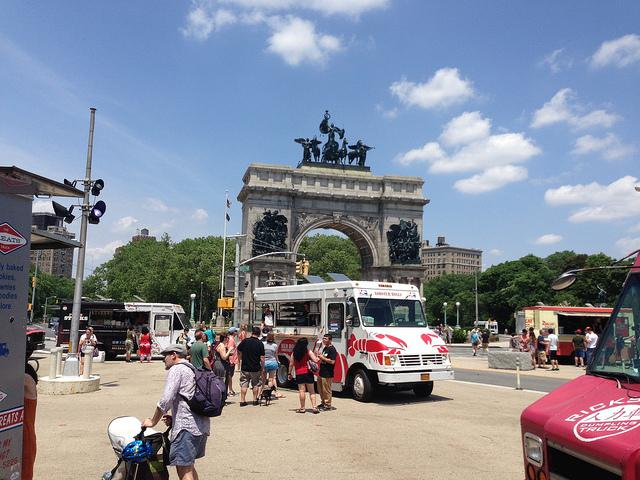

In [9]:
import torch
from PIL import Image

# Load and preprocess
image = Image.open(test_img).convert('RGB')
image

In [10]:
import treelib

In [11]:
def viz_tree(hierarchy, name_map, vals):
    tree = treelib.Tree()
    visited = set()
    for child, parent in hierarchy.items():
        branch = [child, parent]
        while parent in hierarchy and parent not in visited:
            parent = hierarchy[parent]
            branch.append(parent)
        end = len(branch) - 1
        while branch[end] in visited:
            end -= 1
        for j in range(end, -1, -1):
            node = branch[j]
            visited.add(node)
            tree.create_node("{} : {}".format(str(name_map[node]), str(vals[node])), node, parent = hierarchy[node] if node in hierarchy else None)      
    return tree

In [17]:
raw_predictions = hierarchical_yolo.yolo_utils.yolo_raw_predict(trained_model, [image], (640, 640))[0]
raw_predictions.shape

torch.Size([113, 8400])

In [18]:
raw_predictions[:,0]

tensor([4.1880e+00, 3.7829e+00, 1.1895e+02, 1.1948e+02, 7.5396e-06, 7.3978e-06, 6.8985e-06, 7.0749e-06, 7.4516e-06, 7.2258e-06, 7.9080e-06, 6.9552e-06, 7.0472e-06, 7.2333e-06, 6.9327e-06, 7.2237e-06, 7.3268e-06, 7.1051e-06, 6.6861e-06, 6.3906e-06, 7.2962e-06, 7.4162e-06, 6.7349e-06, 7.6914e-06, 7.7856e-06, 7.1529e-06,
        6.9592e-06, 8.2876e-06, 7.4762e-06, 7.1779e-06, 7.6017e-06, 7.2921e-06, 6.7964e-06, 7.1371e-06, 7.4195e-06, 7.0263e-06, 7.1519e-06, 7.0571e-06, 7.2688e-06, 7.2281e-06, 7.1173e-06, 7.3382e-06, 7.6737e-06, 6.8807e-06, 6.5693e-06, 7.6258e-06, 7.0249e-06, 6.9432e-06, 7.6298e-06, 7.3403e-06, 7.3603e-06, 7.3125e-06,
        7.2270e-06, 7.0138e-06, 6.8946e-06, 7.2748e-06, 7.5987e-06, 7.4077e-06, 6.8229e-06, 7.1567e-06, 6.8689e-06, 6.8192e-06, 7.2251e-06, 7.4630e-06, 6.6263e-06, 6.5869e-06, 7.0776e-06, 7.3639e-06, 8.0609e-06, 7.1157e-06, 6.3602e-06, 7.0089e-06, 7.2873e-06, 6.8904e-06, 7.0151e-06, 7.0039e-06, 6.8291e-06, 7.1143e-06,
        6.9533e-06, 7.3718e-06, 6.5012e-

In [12]:
predicted_boxes, predicted_paths, predicted_path_scores = hierarchical_yolo.yolo_utils.hierarchical_predict(trained_model, MSCOCOHierarchicalDetectionTrainer._hierarchy, [image, image])

In [14]:
predicted_boxes

[tensor([], size=(4, 0)), tensor([], size=(4, 0))]

In [13]:
predicted_boxes[0], predicted_paths[0], predicted_path_scores[0]

(tensor([], size=(4, 0)), [], [])

In [26]:
tpaths, tscores = truncate_paths_marginals(predicted_paths[0], predicted_path_scores[0], threshold=0.2)

In [27]:
fboxes, fpaths, fscores = filter_empty_paths(predicted_boxes[0], tpaths, tscores)
fboxes.shape, len(fpaths), len(fscores)

(torch.Size([4, 9]), 9, 9)

In [28]:
fscores[0][0]

tensor(0.9257, device='cuda:0')

In [29]:
fboxes.T

tensor([[235.3572, 438.3596, 265.2780, 542.3510],
        [ 52.7038, 401.1924, 187.6360, 478.0556],
        [307.0861, 443.6520, 337.5935, 548.7240],
        [175.1772, 485.0358, 227.4970, 556.7518],
        [188.4751, 439.5797, 211.1153, 492.8239],
        [510.8625, 408.0593, 619.9163, 485.8191],
        [ 25.8295, 431.1219,  46.9330, 471.1813],
        [107.2043, 554.9303, 170.1802, 619.5905],
        [244.2483, 363.2439, 453.7210, 536.5708]], device='cuda:0')

In [30]:
one_full_pred_loc = int(torch.argmin(torch.abs(raw_predictions[4+80,:] - float(fscores[0][0]))))
one_full_obj_preds = raw_predictions[4:, one_full_pred_loc]
one_full_obj_preds

tensor([2.8330e-06, 4.9587e-04, 1.2090e-04, 2.4465e-08, 4.8940e-02, 4.1073e-04, 3.5376e-06, 2.9411e-04, 4.0896e-04, 4.9225e-06, 8.5736e-05, 2.4241e-04, 2.6912e-06, 9.5183e-04, 3.7658e-05, 2.0756e-04, 4.3545e-05, 6.9560e-03, 2.0813e-03, 8.4486e-06, 1.2596e-03, 6.2345e-04, 6.0723e-06, 7.7152e-08, 1.1630e-03, 1.2685e-04,
        4.4990e-05, 7.1855e-05, 2.9311e-05, 4.5699e-04, 1.9257e-03, 1.7611e-05, 1.9440e-02, 1.4981e-06, 1.5930e-04, 1.5731e-07, 1.3152e-01, 5.6947e-06, 3.2209e-03, 3.9253e-05, 2.4294e-05, 2.1311e-07, 4.4726e-05, 2.4158e-05, 1.1793e-03, 5.6503e-04, 5.0731e-06, 2.5327e-07, 8.4611e-05, 1.0641e-05, 1.3413e-03, 3.2164e-05,
        4.4982e-04, 8.3947e-05, 9.6885e-07, 2.3894e-05, 2.0420e-06, 6.1668e-06, 6.1808e-05, 1.0906e-04, 8.2629e-04, 7.8009e-05, 6.9086e-05, 9.3228e-07, 1.1145e-04, 4.2354e-06, 1.3886e-05, 4.0046e-05, 1.2623e-03, 1.7818e-03, 2.2085e-04, 5.3586e-06, 6.0321e-04, 5.9725e-04, 4.3187e-05, 7.0340e-04, 3.6576e-03, 1.2064e-02,
        4.0894e-05, 1.3853e-03, 9.2568e-

In [31]:
viz_tree(MSCOCOHierarchicalDetectionTrainer._hierarchy, coco128_yolo_names, one_full_obj_preds).show()

object : tensor(0.9257, device='cuda:0')
├── accessory_and_item : tensor(0.0020, device='cuda:0')
│   ├── home_and_office_item : tensor(8.8256e-05, device='cuda:0')
│   │   ├── book : tensor(0.0006, device='cuda:0')
│   │   ├── clock : tensor(4.3187e-05, device='cuda:0')
│   │   ├── scissors : tensor(0.0037, device='cuda:0')
│   │   ├── teddy bear : tensor(0.0121, device='cuda:0')
│   │   └── vase : tensor(0.0007, device='cuda:0')
│   └── personal_accessory : tensor(0.2022, device='cuda:0')
│       ├── backpack : tensor(0.0012, device='cuda:0')
│       ├── handbag : tensor(4.4990e-05, device='cuda:0')
│       ├── suitcase : tensor(2.9311e-05, device='cuda:0')
│       ├── tie : tensor(7.1855e-05, device='cuda:0')
│       └── umbrella : tensor(0.0001, device='cuda:0')
├── food : tensor(0.0016, device='cuda:0')
│   ├── dessert : tensor(0.0002, device='cuda:0')
│   │   ├── cake : tensor(2.3894e-05, device='cuda:0')
│   │   └── donut : tensor(9.6885e-07, device='cuda:0')
│   ├── fruit : ten

(640, 640) (480, 640)
1.0 0.75
(640, 640) (480, 640)
1.0 0.75
(640, 640) (480, 640)
1.0 0.75
(640, 640) (480, 640)
1.0 0.75
(640, 640) (480, 640)
1.0 0.75
(640, 640) (480, 640)
1.0 0.75
(640, 640) (480, 640)
1.0 0.75
(640, 640) (480, 640)
1.0 0.75
(640, 640) (480, 640)
1.0 0.75


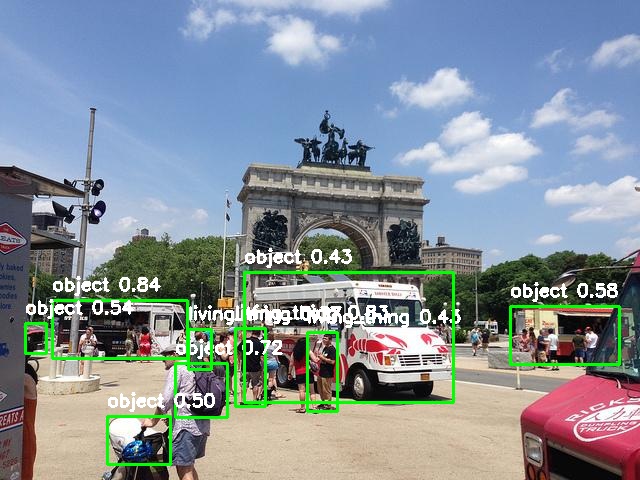

In [32]:
draw_boxes_on_image(image, fboxes.T, 
                    labels=[coco128_yolo_names[fpath[-1]] for fpath in fpaths], 
                    scores=[float(torch.prod(fscore)) for fscore in fscores], box_color=(0, 255, 0), text_color=(255, 255, 255))